In [51]:
import logging
#Logging is a means of tracking events that happen when some software runs
# Create and configure logger
logging.basicConfig(filename="../logs/newfile.log",
                    format='%(asctime)s %(message)s',
                    filemode='w')
 
# Creating an object
logger = logging.getLogger()
 
# Setting the threshold of logger to DEBUG
logger.setLevel(logging.DEBUG)
 
# Test messages
logger.debug("Harmless debug Message")
logger.info("Just an information")
logger.warning("Its a Warning")
logger.error("Did you try to divide by zero")
logger.critical("Internet is down")

# 1. Predicting breast cancer using a machine learning model &causal iferece techiques.


## 1. Data
The data contains information of breat cancer patients, and is donated in 1995 by the University of Wisconsin. It has 569 samples with 32 attributes. 


## 2. Features
Attribute information:
* ID number
* Diagnosis (M = malignant, B = benign)
* 3-32: Ten real-valued features are computed for each cell nucleus:
 * a) radius (mean of distances from center to points on the perimeter)
 * b) texture (standard deviation of gray-scale values)
 * c) perimeter
 * d) area
  * e) smootness (local variation in radius lengths)
  * f) compactness (perimeter^2 / area - 1.0)
  * g) concavity (severity of concave portions of the contour)
  * h) concave points (number of concave portions of the contour)
  * i) symmetry
  * j) fractal dimension ("coastline approximation" -1)



### Import all the tools




In [52]:
# import regular libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import models from Scikit-learn
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# import model evaluation tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve






In [53]:
%matplotlib inline
import sys
sys.path.insert(0,'../scripts/')

In [54]:
from data_loader import load_df_from_csv
from data_struct import DataInfo
from data_cleaner import DataCleaner
%matplotlib inline
import sys
sys.path.insert(0,'../scripts/')

In [55]:
missing_values = ["n/a", "na", "undefined",'']
df= load_df_from_csv("../data/data.csv",na_values=missing_values)

In [56]:
explorer = DataInfo(df)
#initialize module to get data overview

In [57]:
explorer.get_basic_description()

The DataFrame containes 569 rows and 33 columns.
Current DataFrame Memory Usage:
105962
Current DataFrame Memory Usage of columns is :
DataFrame Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    uint32 
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float32
 3   texture_mean             569 non-null    float32
 4   perimeter_mean           569 non-null    float32
 5   area_mean                569 non-null    float32
 6   smoothness_mean          569 non-null    float32
 7   compactness_mean         569 non-null    float32
 8   concavity_mean           569 non-null    float32
 9   concave points_mean      569 non-null    float32
 10  symmetry_mean            569 non-null    float32
 11  fractal_dimension_mean   569 

In [58]:
explorer.get_missing_description()

The total number of missing values is 569
3.03 % missing values.


In [59]:
explorer.get_total_missing_values()


The total number of missing values is 569
3.03 % missing values.


569

In [60]:
explorer.get_columns_with_missing_values()

['Unnamed: 32']

In [61]:
explorer.get_column_based_missing_values()

,missing_count,type
Unnamed: 32,569,float32


In [62]:
explorer.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
id,0,0.0 %
diagnosis,0,0.0 %
radius_mean,0,0.0 %
texture_mean,0,0.0 %
perimeter_mean,0,0.0 %
area_mean,0,0.0 %
smoothness_mean,0,0.0 %
compactness_mean,0,0.0 %
concavity_mean,0,0.0 %
concave points_mean,0,0.0 %


Analysis for duplicates

In [63]:
explorer.get_duplicates()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32


In [64]:
cleaner = DataCleaner(df)

In [65]:
cleaner.remove_unwanted_columns("id")
df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.800003,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.600006,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.899994,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.800003,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [66]:
cleaner.remove_unwanted_columns("Unnamed: 32")

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.990000,10.380000,122.800003,1001.000000,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.379999,17.330000,184.600006,2019.000000,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.570000,17.770000,132.899994,1326.000000,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990000,23.410000,158.800003,1956.000000,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.690001,21.250000,130.000000,1203.000000,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570000,25.530001,152.500000,1709.000000,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.420000,20.379999,77.580002,386.100006,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910000,26.500000,98.870003,567.700012,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.290001,14.340000,135.100006,1297.000000,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540001,16.670000,152.199997,1575.000000,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.559999,22.389999,142.000000,1479.000000,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450001,26.400000,166.100006,2027.000000,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.129999,28.250000,131.199997,1261.000000,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690001,38.250000,155.000000,1731.000000,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.600000,28.080000,108.300003,858.099976,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980000,34.119999,126.699997,1124.000000,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.600000,29.330000,140.100006,1265.000000,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740000,39.419998,184.600006,1821.000000,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [67]:
explorer.get_dispersion_params()

/home/user/causality/notebooks/../scripts/data_struct.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return self.df.describe().append(self.get_mode()).append(self.get_median()).dropna(1)
/home/user/causality/notebooks/../scripts/data_struct.py:191: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = self.df.median()
/home/user/causality/notebooks/../scripts/data_struct.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return self.df.describe().append(self.get_mode()).append(self.get_median()).dropna(1)
/home/user/causality/notebooks/../scripts/data_struct.py:125: FutureWarning: In a future version of pandas all arguments of DataFr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289650,91.969032,654.889038,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269192,25.677223,107.261215,880.583130,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914124,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833241,6.146257,33.602543,569.356995,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790001,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.199997,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.169998,420.299988,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110001,515.299988,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.239998,551.099976,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660004,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.799999,104.099998,782.700012,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790001,29.719999,125.400002,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110001,39.279999,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040001,49.540001,251.199997,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500
Mode,12.340000,14.930000,82.610001,512.200012,0.100700,0.114700,0.000000,0.000000,0.160100,0.056670,...,12.360000,17.700001,101.699997,284.399994,0.121600,0.148600,0.000000,0.000000,0.222600,0.074270
Median,13.370000,18.840000,86.239998,551.099976,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660004,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040


In [68]:
explorer.get_columns()

Columns Listed in the DataFrame are: 


['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

The dataset has zero missig values save for the Unnamed: 32 colum.Let us drop it.

EDA

In [69]:
# see the target value counts
df["diagnosis"].value_counts()
#we have to map this to type int.



B    357
M    212
Name: diagnosis, dtype: int64

In [70]:
# see the target value counts
df["diagnosis"].value_counts(normalize=True)
#we have to map this to type int.

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


def plot_hist(df: pd.DataFrame, column: str, color: str) -> None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()


def plot_count(df: pd.DataFrame, column: str) -> None:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str,) -> None:
    plt.figure(figsize=(10,5))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue=hue)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

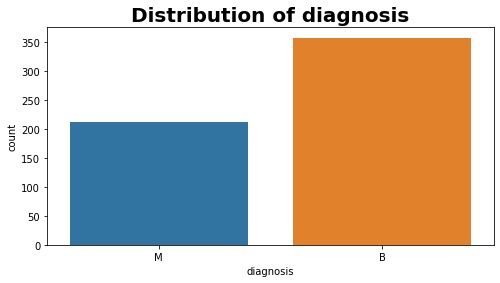

In [72]:
plot_count(df,'diagnosis')

In [73]:
category_as_obj = ["diagnosis"]
for colname in category_as_obj:
    df[colname] = df[colname].astype("category")

In [74]:
data_plot = df.copy()

In [75]:
clean = DataCleaner(data_plot)

In [77]:
clean.remove_unwanted_columns("diagnosis")
data_plot.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.800003,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.379999,17.33,184.600006,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.899994,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.990000,23.41,158.800003,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [78]:
# To find the correlation among
# the columns using pearson method
data_plot.corr(method ='pearson')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [ ]:
#Let us start with a correlation heat map for numerical data columns

plt.figure(figsize = (14,8))
sns.heatmap(data_plot.corr(), annot=True, cmap="jet", vmin=-1, vmax=1)
plt.title('Heatmap', fontweight='bold');

/tmp/ipykernel_15432/2051372181.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f2, (ax_box2, ax_hist2) = plt.subplots(


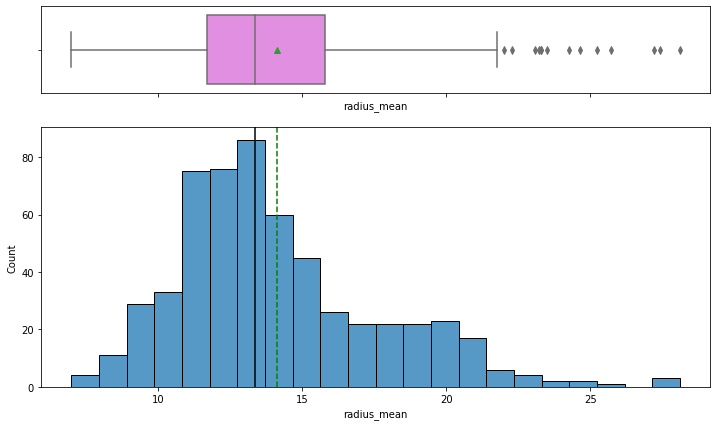

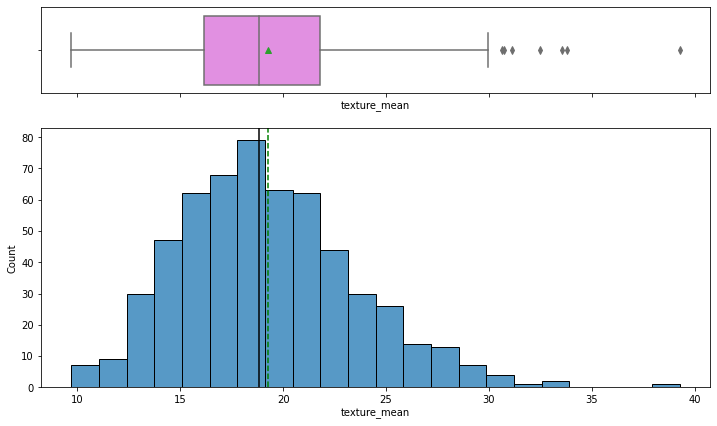

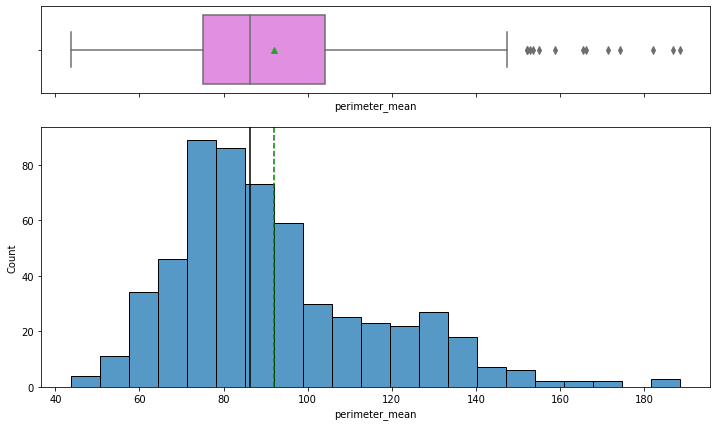

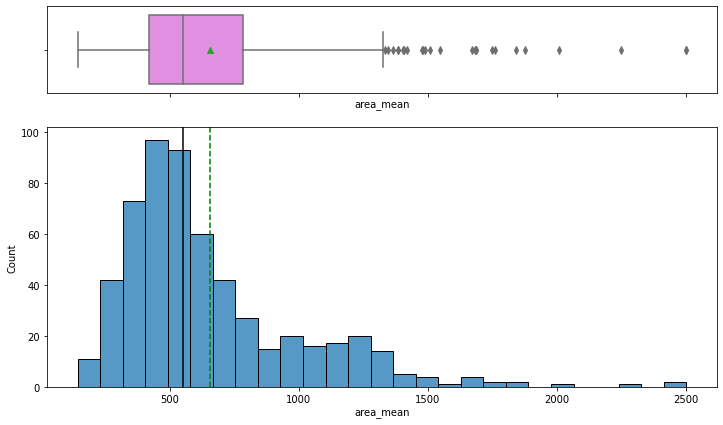

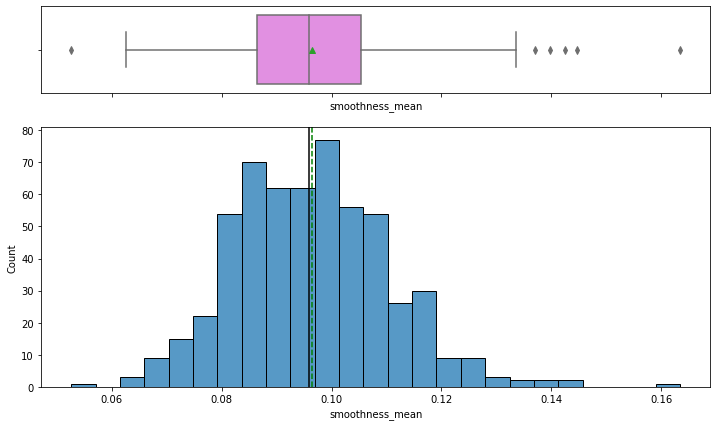

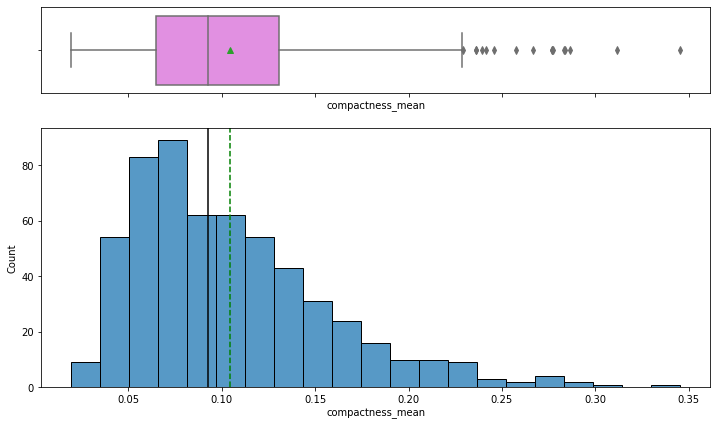

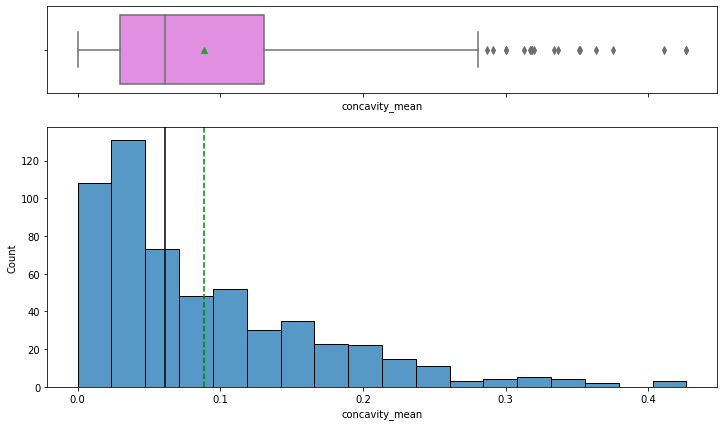

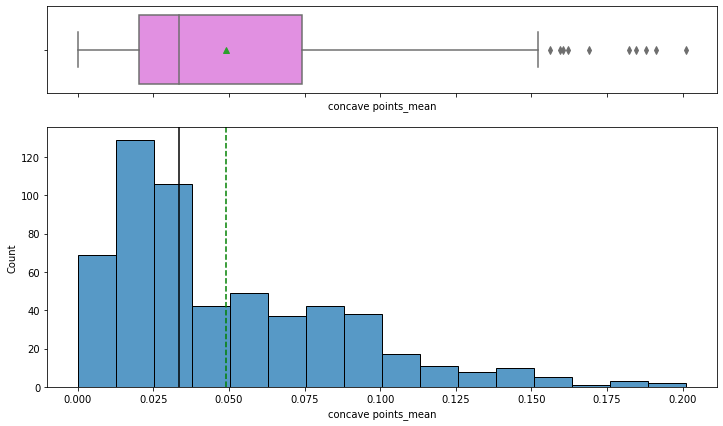

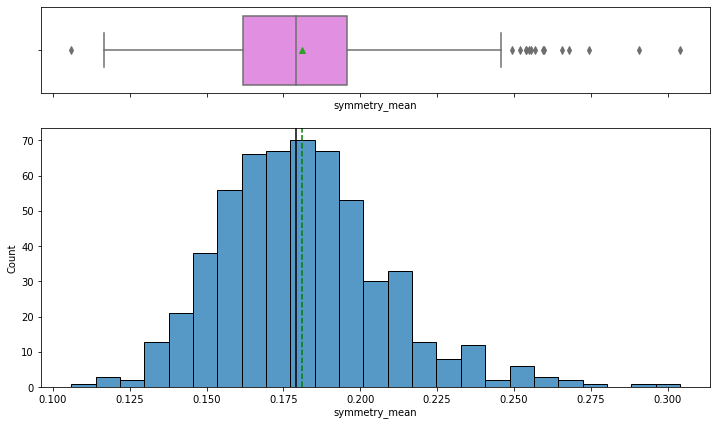

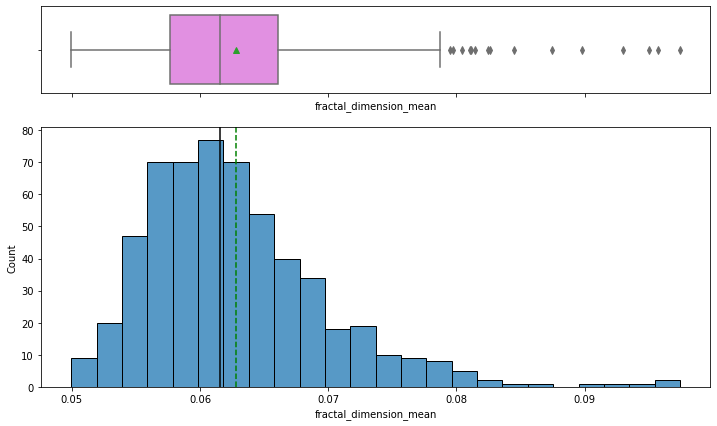

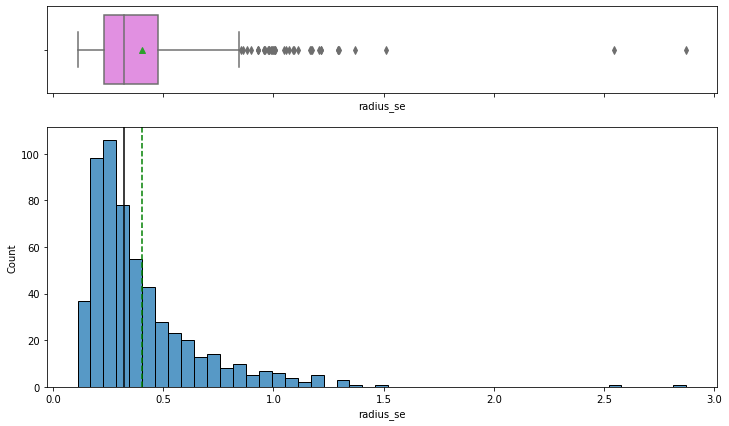

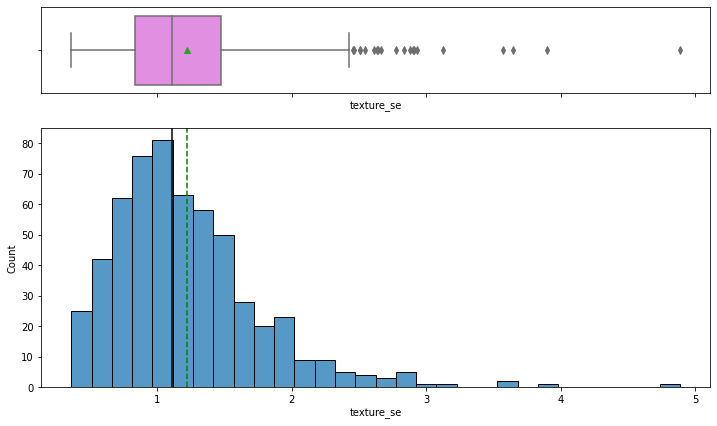

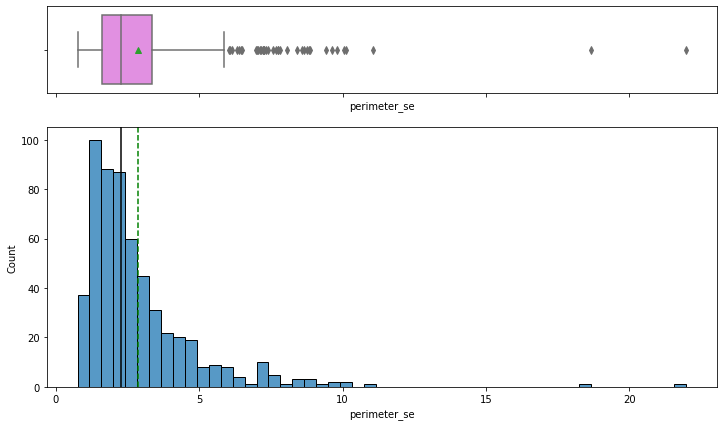

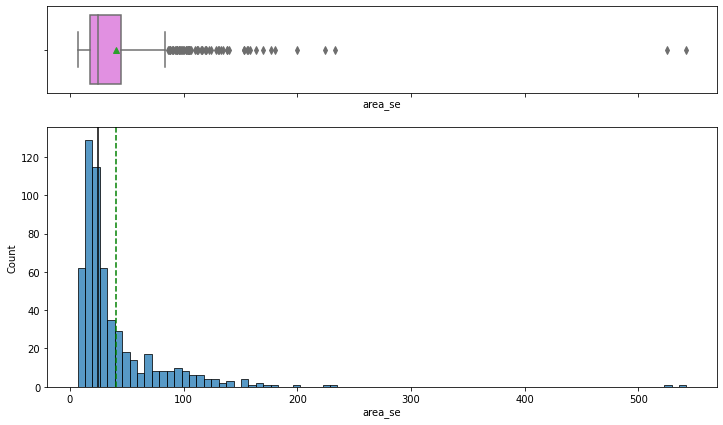

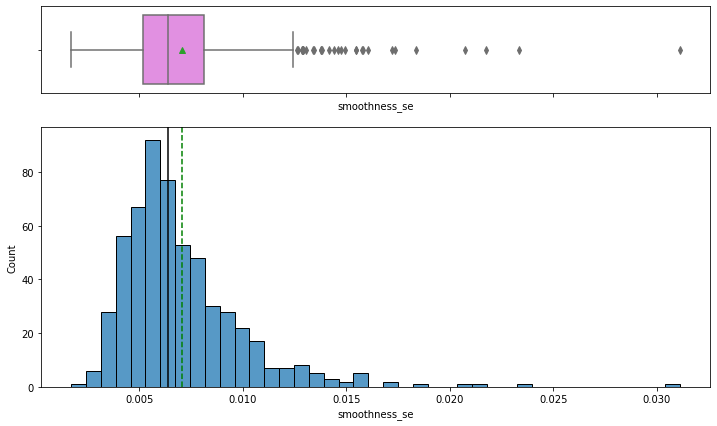

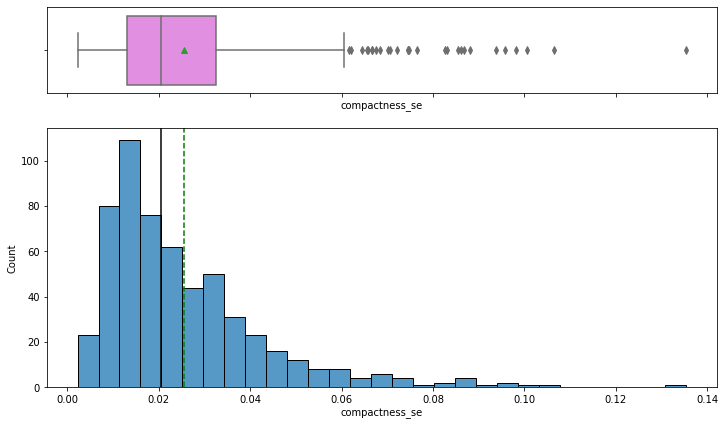

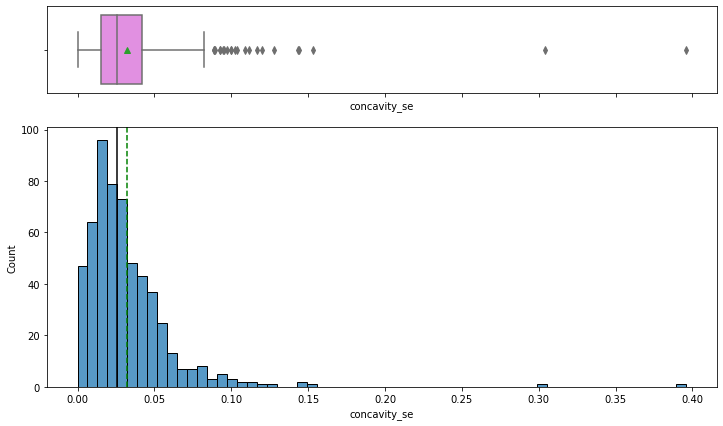

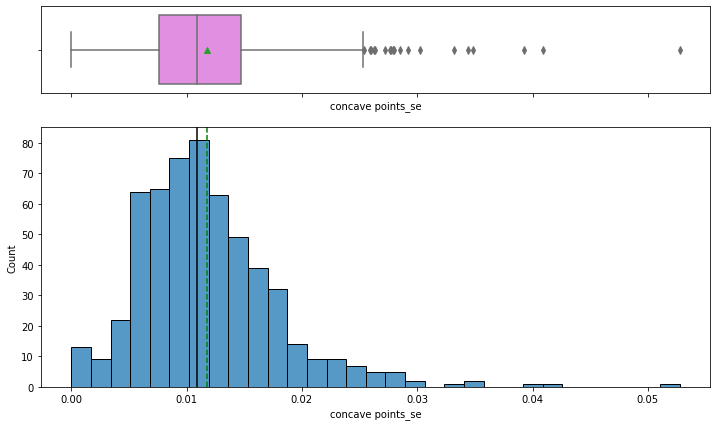

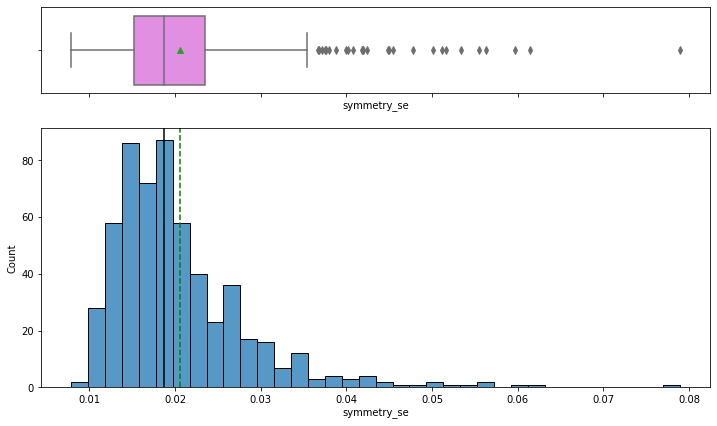

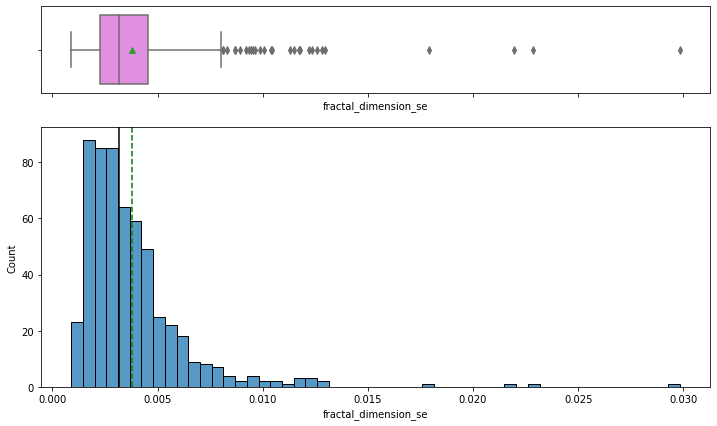

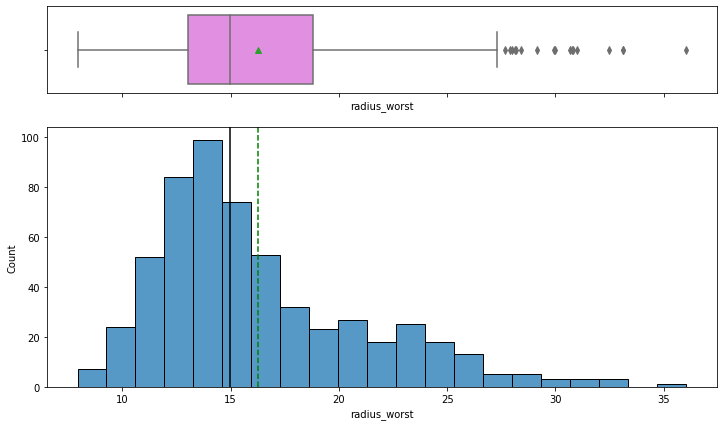

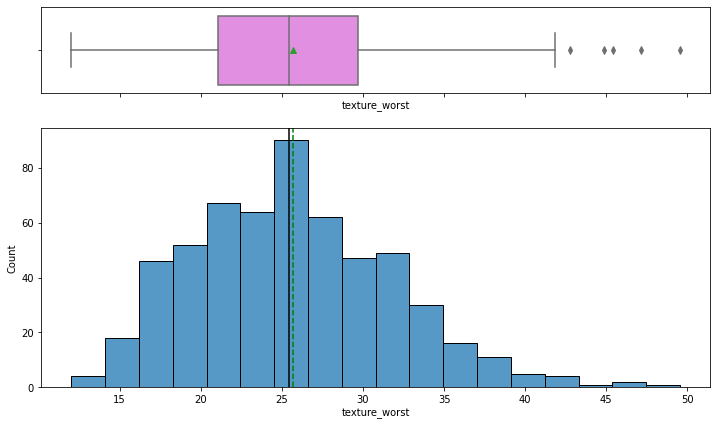

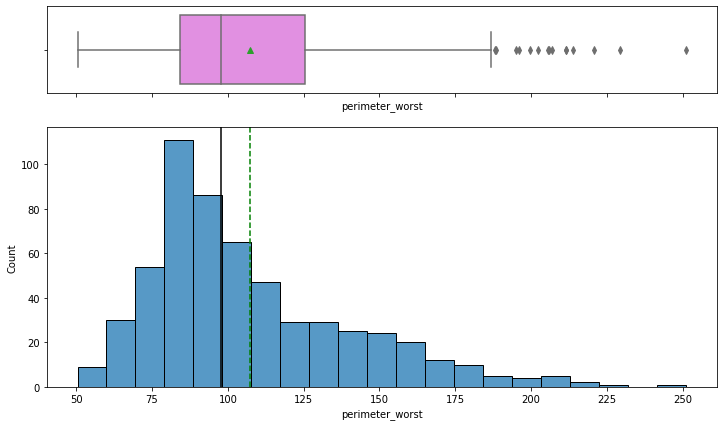

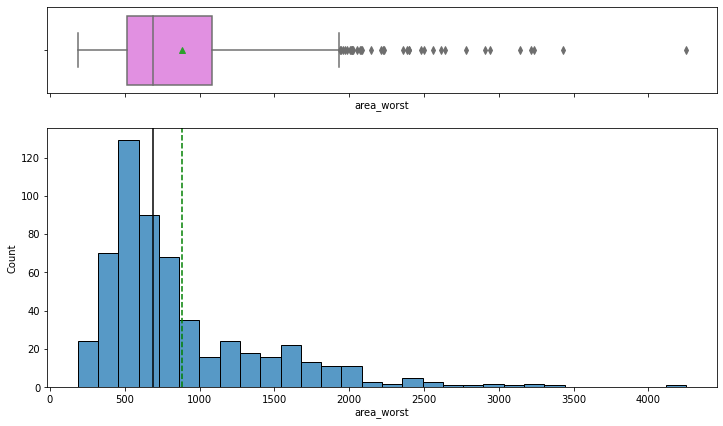

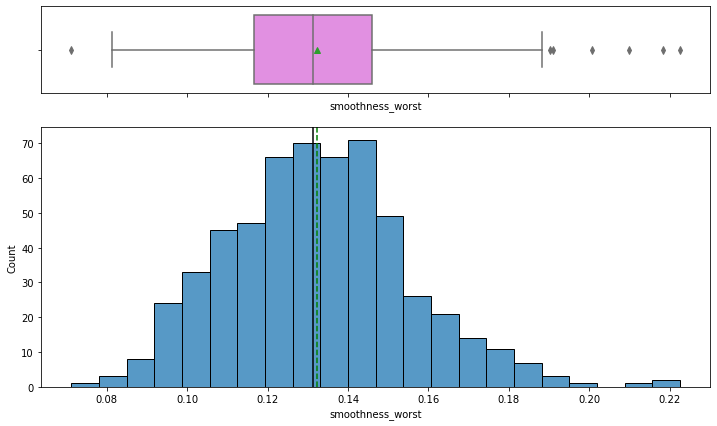

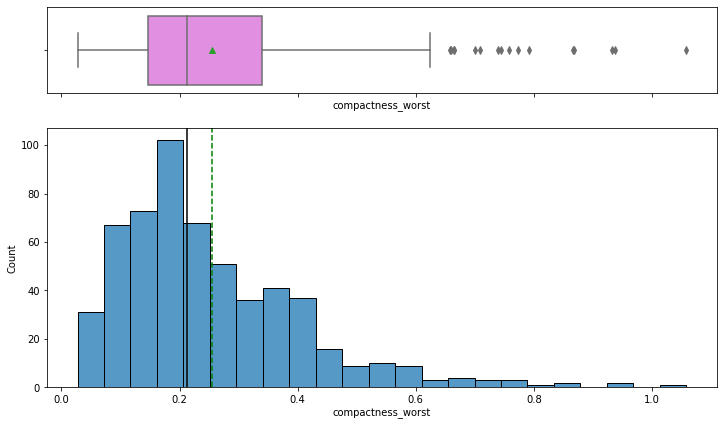

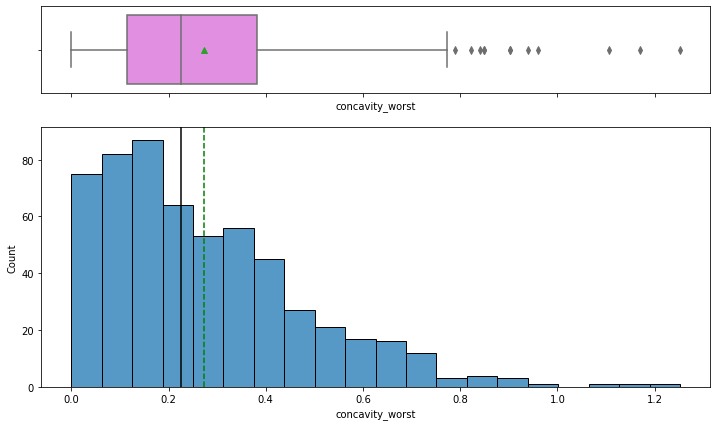

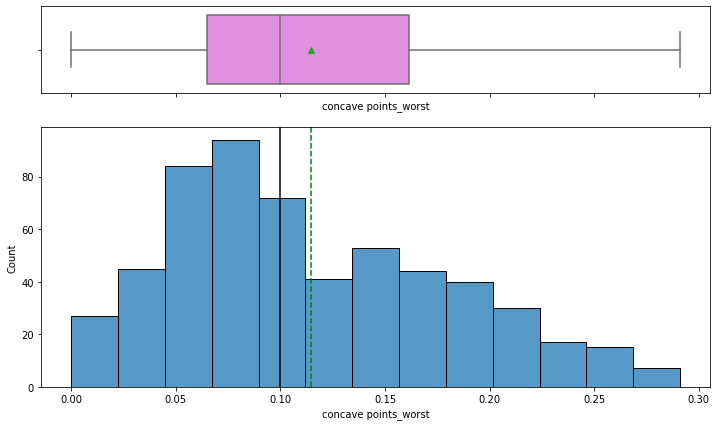

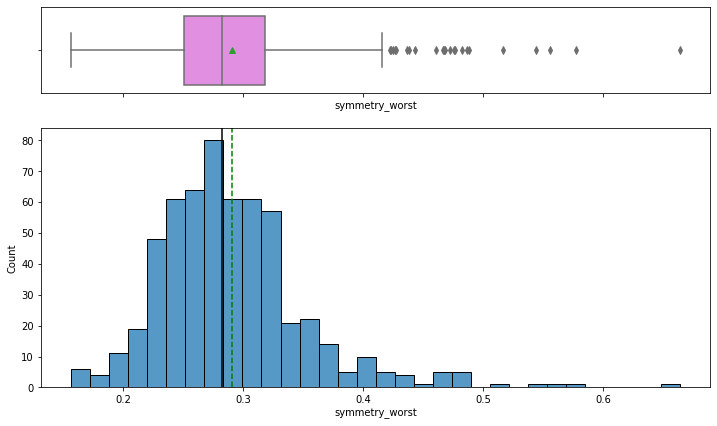

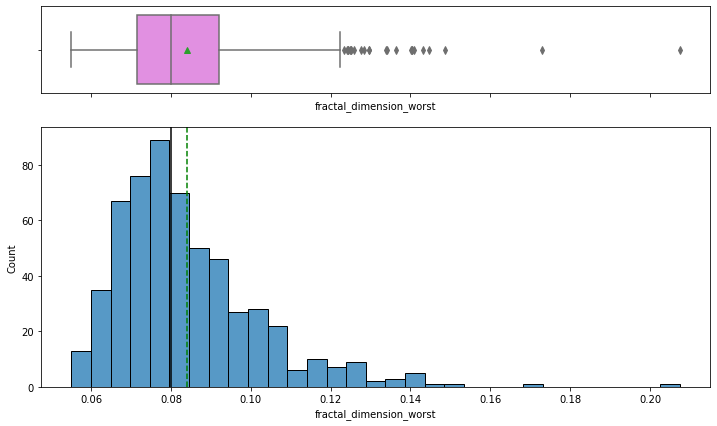

In [79]:
for feature in data_plot.columns:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None) 

6. Outliers Treatment

In [80]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [81]:
clean = DataCleaner(df)


In [82]:
clean_train= clean.save_clean_data('../data/clean_data.csv')

In [83]:
data=pd.read_csv('../data/clean_data.csv')

In [84]:
data.head()

,Unnamed: 0,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
